In [3]:
!pip install fastbook
!pip install fastai

In [5]:
# load dependencies
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import * 
from fastai.vision.all import *

# Gather Data

In [6]:
# pull data using DDG
imgs = search_images_ddg('rainbow trout')
len(imgs)

200

In [7]:
# save image to destination
dest = 'images/rainbow-trout.jpg'
download_url(imgs[0], dest, show_progress=False)

Path('images/rainbow-trout.jpg')

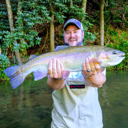

In [8]:
img = Image.open(dest)
img.to_thumb(128,128)

In [9]:
trout_types = 'rainbow', 'brown', 'cutthroat'
path = Path('trout-types')

In [10]:
if not path.exists():
    path.mkdir()
    for trout_type in trout_types:
        dest = (path/trout_type)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{trout_type} trout')
        download_images(dest, urls=results)

In [11]:
# identify image files
img_files = get_image_files(path)
img_files

(#507) [Path('trout-types/cutthroat/ada6f091-8655-46fe-81fd-b75411b33e6f.jpg'),Path('trout-types/cutthroat/8121c590-d4a3-4239-b0f8-649818e88b40.jpg'),Path('trout-types/cutthroat/bcd84a17-99e0-4844-b7d1-11bdb3073768.jpg'),Path('trout-types/cutthroat/09ab5e7a-7546-4d9d-a20a-1797063558e0.jpg'),Path('trout-types/cutthroat/138ad86e-574e-46b5-b745-97cda32f4878.jpg'),Path('trout-types/cutthroat/644d638b-7722-4347-9361-daa17502d63f.jpg'),Path('trout-types/cutthroat/68605870-40cf-400e-a54f-8bbbc768d122.jpg'),Path('trout-types/cutthroat/c949936b-1442-453b-a21e-ab8e0ebc5bf8.jpg'),Path('trout-types/cutthroat/30cf680d-6c29-48ed-a424-e2f4712f4a05.jpg'),Path('trout-types/cutthroat/d02f6804-4dad-46d8-b2b3-2a896d8cb17b.jpg')...]

In [12]:
# check for corrupt files
corrupt_imgs = verify_images(img_files)

In [13]:
# see how many failed
len(corrupt_imgs)

11

In [14]:
# remove faild images
corrupt_imgs.map(Path.unlink);

## Create Data Block

In [16]:
trout = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=23),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)

## Create Data Loaders

In [17]:
dls = trout.dataloaders(path)

## Create a Learner

In [18]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

# train for 5 epochs
learn.fine_tune(5)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

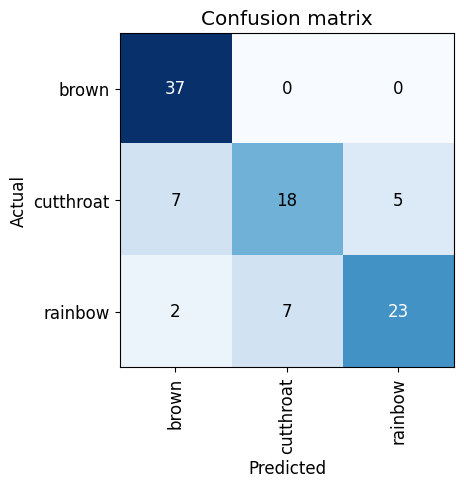

In [19]:
# evaluate confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

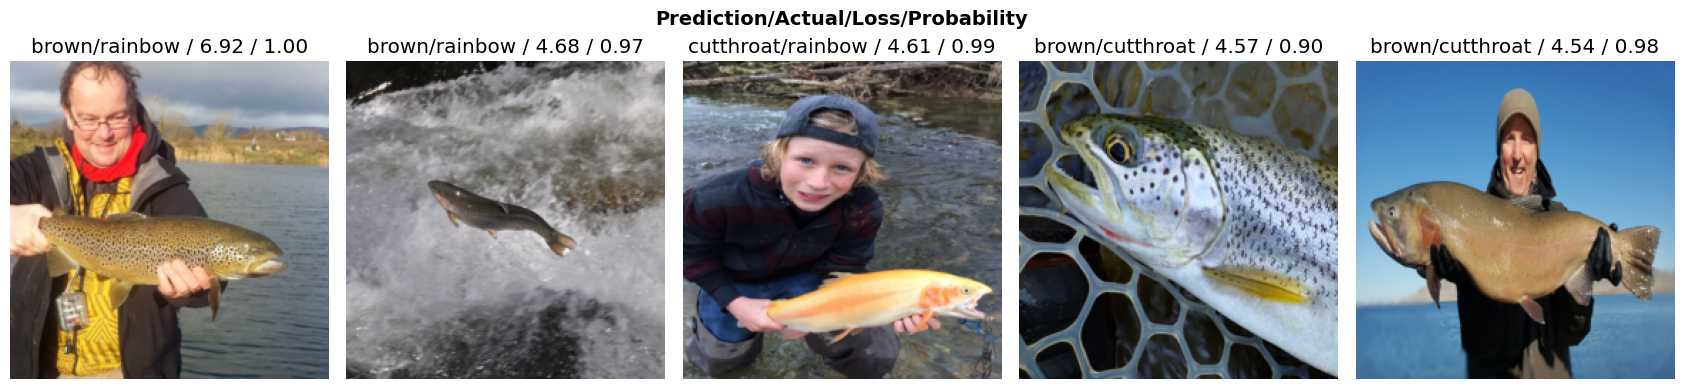

In [20]:
# examine images with top losses
interp.plot_top_losses(5, nrows=1, figsize=(17,4))
plt.tight_layout()

# Check Predictions

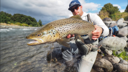

In [22]:
img = Image.open('maxresdefault.jpg')
img.to_thumb(128)

In [23]:
learn.predict(img)

('rainbow', TensorBase(2), TensorBase([0.1380, 0.3808, 0.4813]))